### **Autoregressive Integrated Moving Averages**
The general process for ARIMA models is the following:

1. Visualize the Time Series Data
2. Make the time series data stationary
3. Plot the Correlation and AutoCorrelation Charts
4. Construct the ARIMA Model or Seasonal ARIMA based on the data
5. Use the model to make predictions

### ETL the data for analysis

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
import numpy as np

In [2]:
## loading the data

df = pd.read_csv("D:\others\Personal Projects 2\Practice Files July 2024\perrin-freres-monthly-champagne-.csv")

df.head()

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Alvin\AppData\Local\Temp\ipykernel_13276\2891536838.py:3: SyntaxWarning: invalid escape sequence '\o'
  df = pd.read_csv("D:\others\Personal Projects 2\Practice Files July 2024\perrin-freres-monthly-champagne-.csv")


,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [4]:
df = df.rename(columns = {
    "Perrin Freres monthly champagne sales millions ?64-?72" : "Sales"
})

In [5]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
## dropping the last 2 rows 

df.drop(106, axis = 0, inplace = True)
df.drop(105, axis = 0, inplace = True)

In [7]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [8]:
## datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [9]:
## converting month column into datetime format

df["Month"] = pd.to_datetime(df["Month"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [10]:
## setting month column as the index

df.set_index("Month", inplace = True)

In [11]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [12]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


### Visualize the data

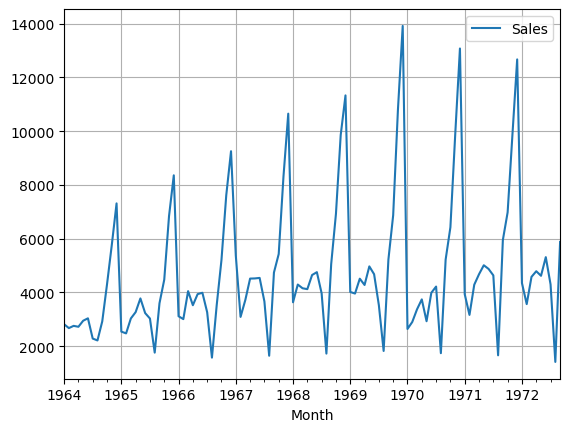

In [14]:
df.plot()
plt.grid(True)

In [16]:
## testing for stationarity

from statsmodels.tsa.stattools import adfuller

test_result = adfuller(df["Sales"])

In [27]:
## Ho : The data is non stationary
## H1 : The data is stationary

def adfuller_test(sales): ## sales is the name of the column we want to predict
    result = adfuller(sales)
    labels = ["ADF Test Statistic", "p-value", "#lags used", "Number of Observations Used"]
    for value, labels in zip(result, labels): ## zip combines the values in the result and labels
        print(labels+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis (Ho), time series has a unit root. Indicating it is non-stationary")

In [28]:
## calling the above function

adfuller_test(df["Sales"])

ADF Test Statistic : -1.833593056327623
p-value : 0.363915771660245
#lags used : 11
Number of Observations Used : 93
Weak evidence against the null hypothesis (Ho), time series has a unit root. Indicating it is non-stationary


#### N/B: If the data is non-stationary, we can do smething we call differencing.

### Differencing.

In [30]:
df["Sales First Difference"] = df["Sales"] - df["Sales"].shift(1) ## shift(1) shifts thevalue in the sales column down by one position

In [34]:
df["Seasonal First Difference"] = df["Sales"] - df["Sales"].shift(12) 

In [35]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [36]:
## testing the adfuller test again with the last column above 

adfuller_test(df["Seasonal First Difference"].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#lags used : 0
Number of Observations Used : 92
Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

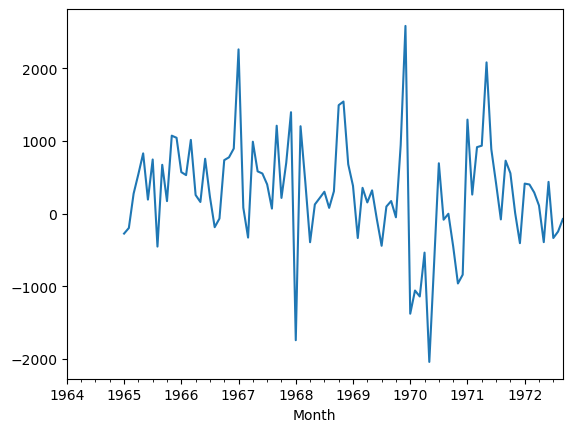

In [37]:
df["Seasonal First Difference"].plot()

##### If the p-value = 0 , it would ahve been a wonderful stationary graph.

##### Since the data is now statioanry, we stop here

#### Building the ARIMA Model

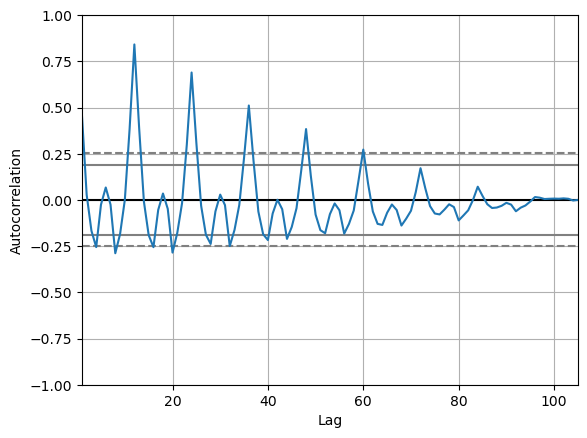

In [40]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df["Sales"])
plt.show()

In [41]:
## using autocorrelation (acf) and partial autocorrelation (pacf)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### *Final Thoughts on Autocorrelation and Partial Autocorrelation*
Identification of an AR model is often best done with the PACF.

*For an AR model:*, 
-the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF. p,d,q

*For an MA model:*
-the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

**1. p - AR model lags, 
  2. d - differencing, 
  3. q - MA lags**

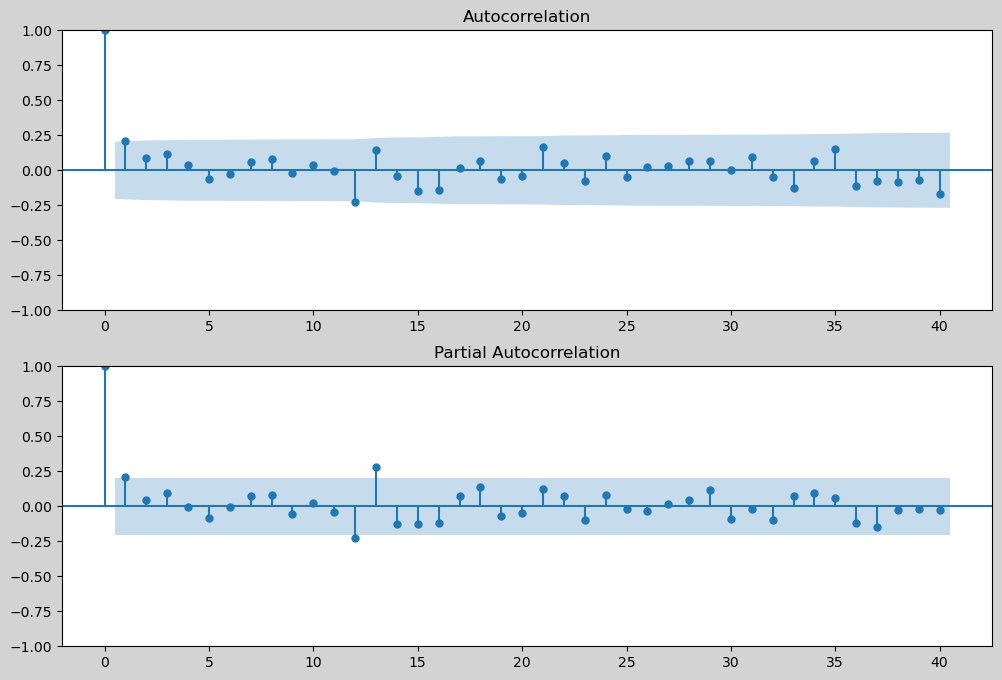

In [44]:
fig = plt.figure(figsize = (12,8), facecolor = "lightgrey")
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1) ## iloc[13:] you can replace this with drop.na() since the first 12 values are null.
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

###### E.G like in the above scenario, the values are as follows p = 1, d = 1, q = 0 or 1 

In [47]:
## implementing the ARIMA model (p,d,q)

from statsmodels.tsa.arima.model import ARIMA

##### N/B The Arima model can only be used for non-seasonal data.

In [49]:
model = ARIMA(df["Sales"], order = (1,1,1)) # order = (p,d,q) values above.
model_fit = model.fit()

C:\Users\Alvin\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alvin\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alvin\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [50]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Fri, 21 Mar 2025   AIC                           1911.627
Time:                        16:07:20   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

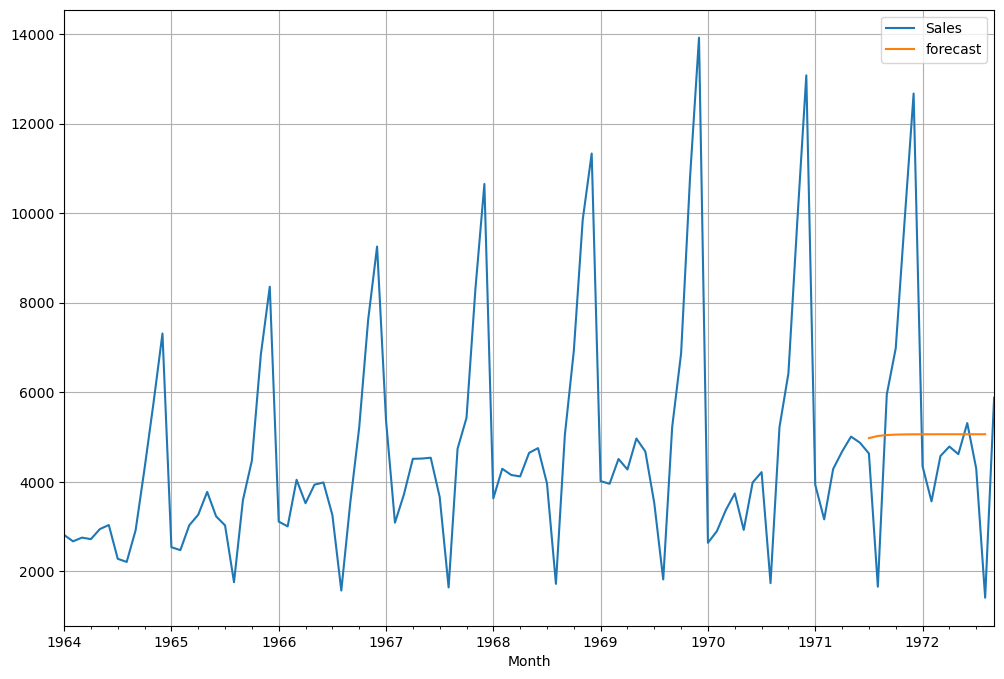

In [54]:
## plotting the results

df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8), grid = True)

### Seasonal ARIMAX (SARIMAX)

In [52]:
import statsmodels.api as sm

In [53]:
## defining the model

model = sm.tsa.statespace.SARIMAX(df["Sales"], order = (1,1,1), seasonal_order=(1,1,1,12))
# in seasonal_order=(1,1,1,12) parameter, the first three (p,d,q) are the same whereas the 12 represents the number of times we shifted the data
## fitting the model

results = model.fit()

C:\Users\Alvin\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alvin\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

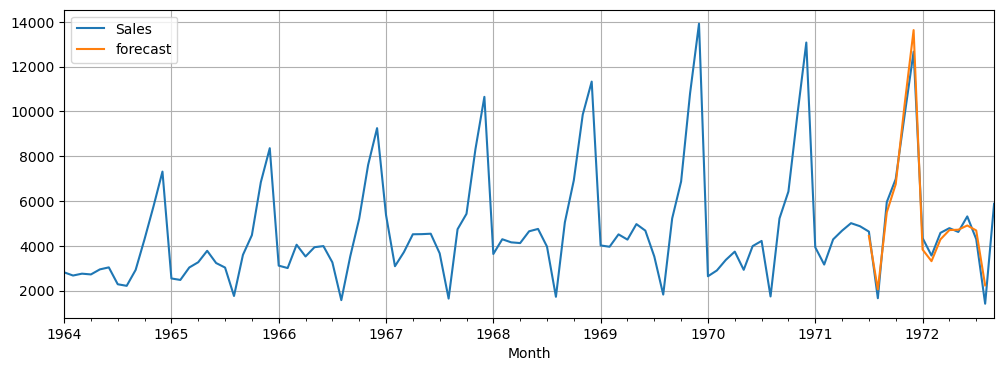

In [56]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,4), grid = True)

#### Creating a forecast for the next 24 months 

In [57]:
## creating a forecast for the next 24 months 

from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [58]:
future_df=pd.concat([df,future_datest_df])

C:\Users\Alvin\AppData\Local\Temp\ipykernel_13276\1723908026.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])


<Axes: >

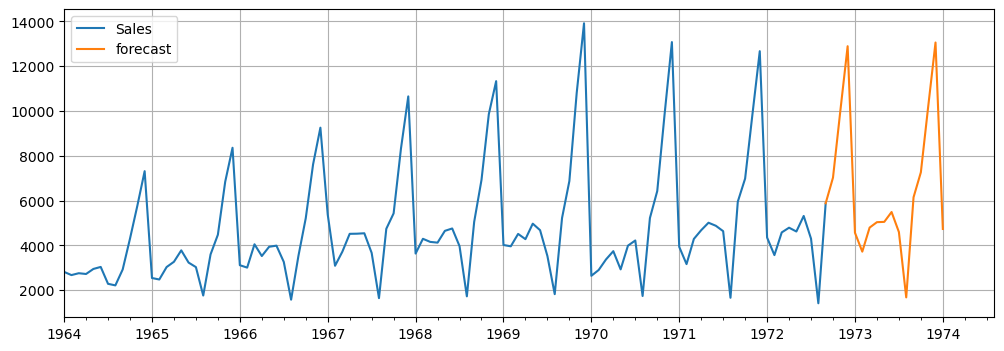

In [62]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True) 
future_df[['Sales', 'forecast']].plot(figsize=(12, 4), grid=True) 